<a href="https://www.kaggle.com/code/vtrackstar/linkedin-python-for-de-capstone-project?scriptVersionId=207157416" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-sales-linkedin-capstone/retail_sales.csv


## Ask
* **Objective:** Create a Python script that analyzes a retail sales dataset, focusing on data manipulation with pandas and visualization of sales trends.
* **Tasks:** Calculate total sales per product, identify the best-selling product, compute average daily sales. Plot sales trends over time, display sales per product in a bar chart. Define a Python class *RetailSalesAnalyzer* with methods for each of the above tasks. Write a script that creates an instance of *RetailSalesAnalyzer*, calls its methods and displays the results.

## Prepare and Process

In [2]:
sales = pd.read_csv('/kaggle/input/retail-sales-linkedin-capstone/retail_sales.csv')
print(sales.head())

class RetailSalesAnalyzer:
    def __init__(self):
        self.data = sales
        self.data['Date'] = pd.to_datetime(self.data['Date'])

    def data_clean(self):
        self.data.dropna(inplace=True)

## Calculate total sales per product
    def total_sales_per_product(self):
        return self.data.groupby('Product')['Sales'].sum()

## Identify the best-selling product.
    def best_selling_product(self):
        return self.total_sales_per_product().sort_values(ascending=False).index[0]

## Compute average daily sales.
    def average_daily_sales(self):
        return self.data['Sales'].mean()

## Plot sales trends over time.
    def plot_sales_trend(self):
        self.data.groupby('Date')['Sales'].sum().plot(kind='line')
        plt.title('Sales Trend Over Time')
        plt.xlabel('Date')
        plt.ylabel('Total Sales')
        plt.show()

## Display sales per product in a bar chart.
    def plot_sales_per_product(self):
        self.total_sales_per_product().plot(kind='bar')
        plt.title('Sales Per Product')
        plt.xlabel('Product')
        plt.ylabel('Total Sales')
        plt.show()

         Date    Product  Quantity  Sales
0  2023-01-01  Product A         5     50
1  2023-01-01  Product B         2     40
2  2023-01-02  Product A         7     70
3  2023-01-02  Product C         3     90
4  2023-01-03  Product B         4     80


## Share

 Total Sales Per Product: 
  Product
Product A    130
Product B    140
Product C    150
Name: Sales, dtype: int64
Best Selling Product:  Product C
Average Daily Sales 52.5


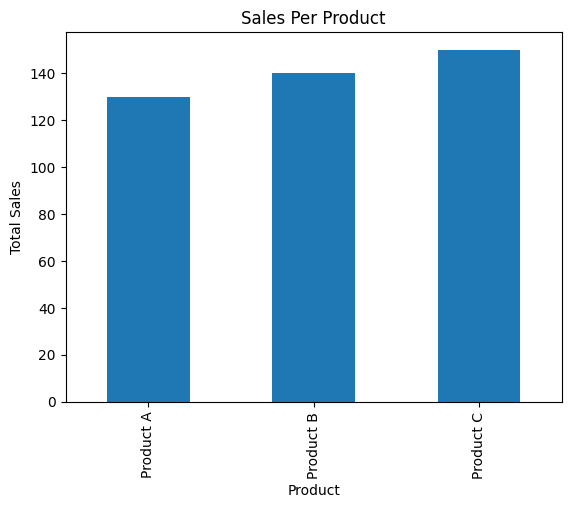

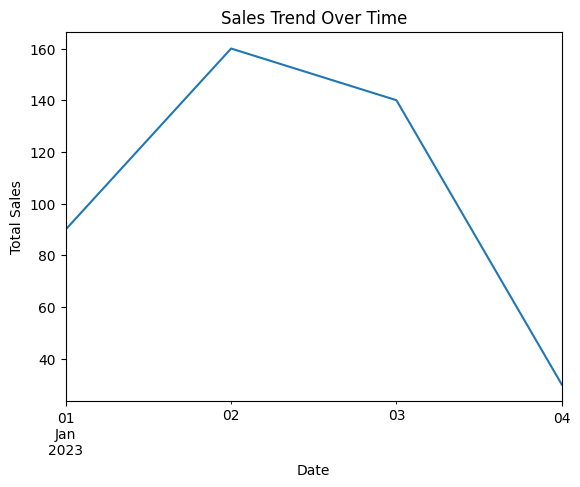

In [3]:
analyzer = RetailSalesAnalyzer()
print(' Total Sales Per Product: \n ', analyzer.total_sales_per_product())
print('Best Selling Product: ', analyzer.best_selling_product())
print('Average Daily Sales', analyzer.average_daily_sales())
analyzer.plot_sales_per_product()
analyzer.plot_sales_trend()